<center>
    <h1><b> KNN - Digits Classification </b></h1>
</center>

## Problem

From sklearn datasets load digits dataset and do the following

 1. Classify digits (0 to 9) using KNN clssifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
 2. Plot confusion matrix
 3. Plot classification report

In [1]:
# importtion of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle as pk

%matplotlib inline

In [2]:
# Loading dataset
digits = load_digits()

### Data Exploration

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [5]:
# Adding target variable to the dataframe
df['target'] = digits.target
df[:2]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


### Splitting the dataset

In [6]:
X = df.drop(columns = 'target', axis = 1)
y = df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
len(X_train), len(X_test)

(1437, 360)

## Elbow Plot

In [9]:
k_range = range(1, 10)
sse = []  # This is sum of squre error
for k in k_range:
    km = KMeans(n_clusters = k, n_init = 10)
    km.fit(X)
    sse.append(km.inertia_)

In [10]:
sse

[2159057.2910406226,
 1914619.6175501032,
 1730184.7025430466,
 1609622.1771260188,
 1497606.9219816688,
 1409230.6625312986,
 1336474.0489559497,
 1265064.3150454902,
 1202350.4559370463]

C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


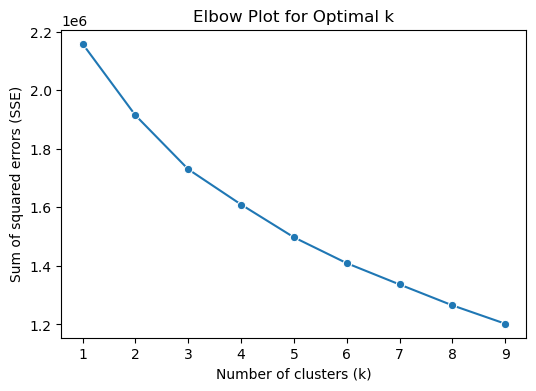

In [11]:
# Plot the elbow plot to determine the optimal k
plt.figure(figsize=(6, 4))
sb.lineplot(x=k_range, y=sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Plot for Optimal k')
plt.show();

In [12]:
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': [9, 12, 15]
}, cv = 5, return_train_score = False)

In [13]:
# Building the model
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [9, 12, 15]})

In [14]:
clf.cv_results_

{'mean_fit_time': array([0.00309663, 0.009374  , 0.0086482 ]),
 'std_fit_time': array([0.00619326, 0.00765384, 0.00718459]),
 'mean_score_time': array([0.35133948, 0.21409464, 0.20507593]),
 'std_score_time': array([0.27417129, 0.01165263, 0.0096924 ]),
 'param_n_neighbors': masked_array(data=[9, 12, 15],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 9}, {'n_neighbors': 12}, {'n_neighbors': 15}],
 'split0_test_score': array([0.97569444, 0.97569444, 0.97569444]),
 'split1_test_score': array([0.98263889, 0.97569444, 0.97569444]),
 'split2_test_score': array([0.98606272, 0.98606272, 0.98954704]),
 'split3_test_score': array([0.97212544, 0.96515679, 0.96515679]),
 'split4_test_score': array([0.98606272, 0.9825784 , 0.9825784 ]),
 'mean_test_score': array([0.98051684, 0.97703736, 0.97773422]),
 'std_test_score': array([0.00565133, 0.00716819, 0.00811815]),
 'rank_test_score': array([1, 3, 2])}

In [15]:
df_result = pd.DataFrame(clf.cv_results_)
df_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003097,0.006193,0.351339,0.274171,9,{'n_neighbors': 9},0.975694,0.982639,0.986063,0.972125,0.986063,0.980517,0.005651,1
1,0.009374,0.007654,0.214095,0.011653,12,{'n_neighbors': 12},0.975694,0.975694,0.986063,0.965157,0.982578,0.977037,0.007168,3
2,0.008648,0.007185,0.205076,0.009692,15,{'n_neighbors': 15},0.975694,0.975694,0.989547,0.965157,0.982578,0.977734,0.008118,2


In [16]:
# Viewng the evaluation score
clf.best_score_

0.9805168408826945

In [17]:
# Viewing the best parameter
clf.best_params_

{'n_neighbors': 9}

In [18]:
# Selecting the best model
model = clf.best_estimator_

### Confusion Matrix

In [19]:
# Predicting the test values
y_pred = model.predict(X_test)

In [20]:
# Calculating the confusion matrix
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  0,  2,  0,  0,  0,  1, 34,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

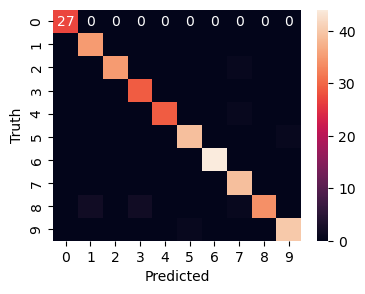

In [21]:
# Plotting the confusion matrix visualization
plt.figure(figsize = (4, 3))
sb.heatmap(con_mat, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

### Classification Report

In [22]:
cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.95      1.00      0.97        35
           2       1.00      0.97      0.99        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       0.93      1.00      0.96        39
           8       1.00      0.87      0.93        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



### Saving the Best Model as pickle file

In [23]:
with open('model_KNN_DIgits.pkl', 'wb') as fl:
    pk.dump(model, fl)